https://discourse.onlinedegree.iitm.ac.in/t/lec-3-4-overfitting/28384

-- ShreyanshBardia

In [1]:
import matplotlib.pyplot as plt
import itertools
import functools
import numpy as np

def polynomialtransformation(x,degree):
    x=np.array(x) if x.ndim!=1 else np.array(x).reshape(-1,1)
    x_t=x.T
    features=[np.ones(x.shape[0])]
    for d in range(1,degree+1):
      f=itertools.combinations_with_replacement(x_t,d)
      for it in f:  
        features.append(functools.reduce(lambda x,y:x*y,it))
    return np.array(features).T
def gd(x,y,lr,num_of_iter):
  w=np.zeros(x.shape[-1])
  for _ in range(num_of_iter):
    w=w-lr*x.T@(x@w-y)
  return w
def fit(x,y):
  return np.linalg.pinv(x) @ y
def visualize(x,y,w):
  plt.scatter(x,y)
  x_ax=np.linspace(0,1,100)
  plt.plot(x_ax,np.sin(2*np.pi*x_ax),label="sin()")
  plt.plot(x_ax,polynomialtransformation(x_ax,9)@w,label="fit")
  plt.legend()
  plt.show()

x=np.linspace(0,1,10)
y=np.sin(2*np.pi*x)+np.random.normal(scale=0.2,size=10)

w=gd(polynomialtransformation(x,9),y,0.01,100000)
visualize(x,y,w)

<Figure size 640x480 with 1 Axes>

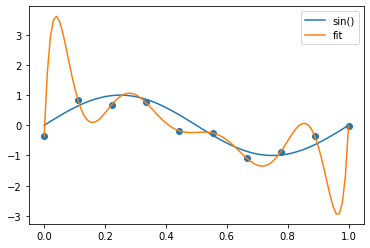

In [2]:
w=fit(polynomialtransformation(x,9),y)
visualize(x,y,w)